In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential
import tensorflow as tf

In [2]:
train_datagen = ImageDataGenerator(
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None,
    validation_split=0.2)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_generator = train_datagen.flow_from_directory("drive/My Drive/Datasets/Planets and Moons",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos",
                                                    subset="training")
test_generator = train_datagen.flow_from_directory("drive/My Drive/Datasets/Planets and Moons",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos",
                                                    subset="validation")

Found 1319 images belonging to 11 classes.
Found 319 images belonging to 11 classes.


In [6]:
def planet_model():
  img_rows, img_cols = 256, 256
  img_channels = 3

  img_dim = (img_rows, img_cols, img_channels)

  img_input = Input(shape=img_dim)

  x = Conv2D(128, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(img_input)
  x = BatchNormalization()(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(256, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(512, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Flatten()(x)
  x = Dense(128, activation='ReLU')(x)
  x = Dense(11, activation='softmax')(x)

  model = Model(inputs=img_input, outputs= x)
  return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     1664      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 spatial_dropout2d (SpatialD  (None, 128, 128, 128)    0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                             

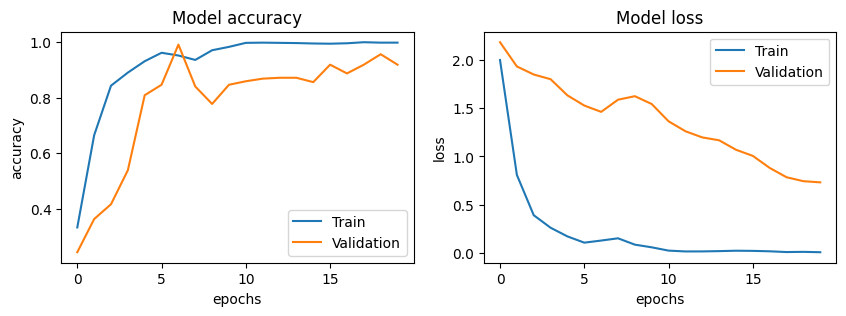

3/3 [==============================] - 9s 2s/step
              Classification_report 
              Results 
    Test Loss:  0.73132  
Test Accuracy:  91.85%  


In [7]:
model = planet_model()
model.summary()

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
my_callbacks  =  [keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")]

history = model.fit(train_generator,
                  validation_data=test_generator,
                  epochs=20,
                  callbacks=my_callbacks,
                  verbose=1,
                  batch_size=128,)
# Plotting Accuracy, val_accuracy, loss, val_loss
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
plt.show()

# Predict Data Test
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

print('\033[01m              Classification_report \033[0m')

print('\033[01m              Results \033[0m')
# Results
results = model.evaluate(test_generator, verbose=0)
print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))



Input image shape: (1, 256, 256, 3)


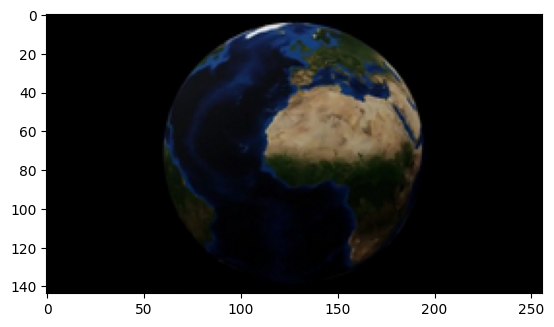

In [19]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image

path = "drive/My Drive/Datasets/test5.jpg"

#img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
x = image.load_img(path, target_size=(256,256))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)

print('Input image shape:', x.shape)

my_image = imread(path)
imshow(my_image)

In [10]:
def prediction(model,data):
  prediction = model.predict(data)
  if prediction[0].max() == prediction[0][0]:
    print("Planet Prediction is 'Earth'! ")
  elif prediction[0].max() == prediction[0][1]:
    print("Planet Prediction is 'Jupiter'! ")
  elif prediction[0].max() == prediction[0][2]:
    print("Dwarf Planet Prediction is 'Makemake'! ")
  elif prediction[0].max() == prediction[0][3]:
    print("Planet Prediction is 'Mars'! ")
  elif prediction[0].max() == prediction[0][4]:
    print("Planet Prediction is 'Mercury'! ")
  elif prediction[0].max() == prediction[0][5]:
    print("Moon Prediction is 'Moon'! ")
  elif prediction[0].max() == prediction[0][6]:
    print("Planet Prediction is 'Neptune'! ")
  elif prediction[0].max() == prediction[0][7]:
    print("Dwarf Planet Prediction is 'Pluto'! ")
  elif prediction[0].max() == prediction[0][8]:
    print("Planet Prediction is 'Saturn'! ")
  elif prediction[0].max() == prediction[0][9]:
    print("Planet Prediction is 'Uranus'! ")
  elif prediction[0].max() == prediction[0][10]:
    print("Planet Prediction is 'Venus'! ")

In [20]:
prediction(model,x)

1/1 [==============================] - 0s 37ms/step
Planet Prediction is 'Earth'! 


Input image shape: (1, 256, 256, 3)


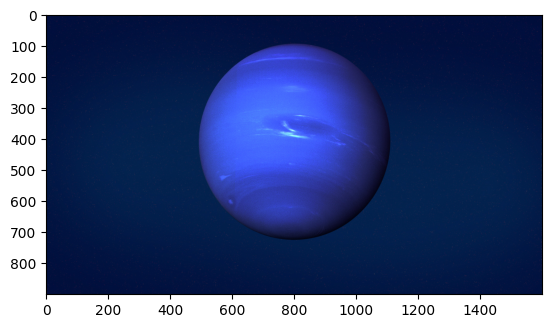

In [14]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image

path = "drive/My Drive/Datasets/test4.jpg"

#img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
x2 = image.load_img(path, target_size=(256,256))
x2 = image.img_to_array(x2)
x2 = np.expand_dims(x2, axis=0)

print('Input image shape:', x2.shape)

my_image2 = imread(path)
imshow(my_image2)

In [15]:
prediction(model,x2)

1/1 [==============================] - 0s 36ms/step
Planet Prediction is 'Neptune'! 


In [21]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

In [95]:
X_RF = model.predict(X_train)
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 400, random_state = 42)


4/4 [==============================] - 2s 593ms/step


In [96]:
RF_model.fit(X_RF, y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [97]:
X_test_feature = model.predict(X_test)
#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_feature)



4/4 [==============================] - 2s 584ms/step


In [98]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))


Accuracy =  0.890625
